****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df1 = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#df2 = pd.read_csv('5_minutes_WDO_2018-08-31_2018-08-31.csv')
#df3 = pd.read_csv('WDO_2018-09-03_2018-09-28.csv')

#frames = [df1, df2, df3]
#result = pd.concat(frames)

#data_frame = pd.read_csv('5_minutes_WDO_2018-07-02_2018-08-30.csv')
#data_frame = pd.read_csv('DOL_2018-08-01_2018-08-31.csv')
data_frame = pd.read_csv('ITUB4_2018-09-03_2018-09-28.csv')
#data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-24.csv')
#data_frame = pd.read_csv('WDO_2018-07-02_2018-09-28.csv')
#data_frame = result

In [3]:
data_frame.count()

Start                        2309
End                          2309
NegociatedOffersAmount       2309
TotalTradedQuantity          2309
RSIIndicator                 2309
SMAIndicatorDiff             2309
EMAIndicatorDiff             2309
UpperBollingerBand           2309
LowerBollingerBand           2309
MiddleBollingerBand          2309
MACD                         2309
AroonUpIndicator             2309
AroonDownIndicator           2309
AroonIndicator               2309
PlusDirectionalIndicator     2309
MinusDirectionalIndicator    2309
ADXIndicator                 2309
CCI                          2309
CMO                          2309
ROC                          2309
BuySignal                    2309
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.4400173235166739

In [5]:
train_y = data_frame['BuySignal']
train_x = data_frame.drop(['BuySignal'], axis=1)

In [6]:
train_x.count()

Start                        2309
End                          2309
NegociatedOffersAmount       2309
TotalTradedQuantity          2309
RSIIndicator                 2309
SMAIndicatorDiff             2309
EMAIndicatorDiff             2309
UpperBollingerBand           2309
LowerBollingerBand           2309
MiddleBollingerBand          2309
MACD                         2309
AroonUpIndicator             2309
AroonDownIndicator           2309
AroonIndicator               2309
PlusDirectionalIndicator     2309
MinusDirectionalIndicator    2309
ADXIndicator                 2309
CCI                          2309
CMO                          2309
ROC                          2309
dtype: int64

In [7]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal
0,03/09/2018 11:25:00,03/09/2018 11:28:00,128,55900,0.394737,-0.020000,0.033470,0.219538,-0.179538,0.020000,...,14.285714,100.000000,-85.714286,17.585905,24.000935,0.000000,-46.774733,-24.561404,0.023935,1
1,03/09/2018 11:28:00,03/09/2018 11:31:00,58,19800,0.494505,0.000714,0.046341,0.199049,-0.200478,-0.000714,...,7.142857,92.857143,-85.714286,22.179673,21.049561,0.000000,-12.872358,0.884956,0.000000,0
2,03/09/2018 11:31:00,03/09/2018 11:34:00,59,23500,0.394737,0.022143,0.048829,0.155045,-0.199331,-0.022143,...,21.428571,85.714286,-64.285714,19.924403,18.909203,25.454376,-3.404149,30.693069,0.000000,0
3,03/09/2018 11:34:00,03/09/2018 11:37:00,65,13100,0.455882,-0.003571,0.016318,0.175010,-0.167867,0.003571,...,14.285714,78.571429,-64.285714,20.030962,16.746465,24.484596,2.407266,-5.494505,0.000000,1
4,03/09/2018 11:37:00,03/09/2018 11:40:00,72,23800,0.442857,0.032143,0.040143,0.133559,-0.197845,-0.032143,...,7.142857,71.428571,-64.285714,19.061865,14.911780,24.599977,-0.957926,48.387097,-0.047801,1


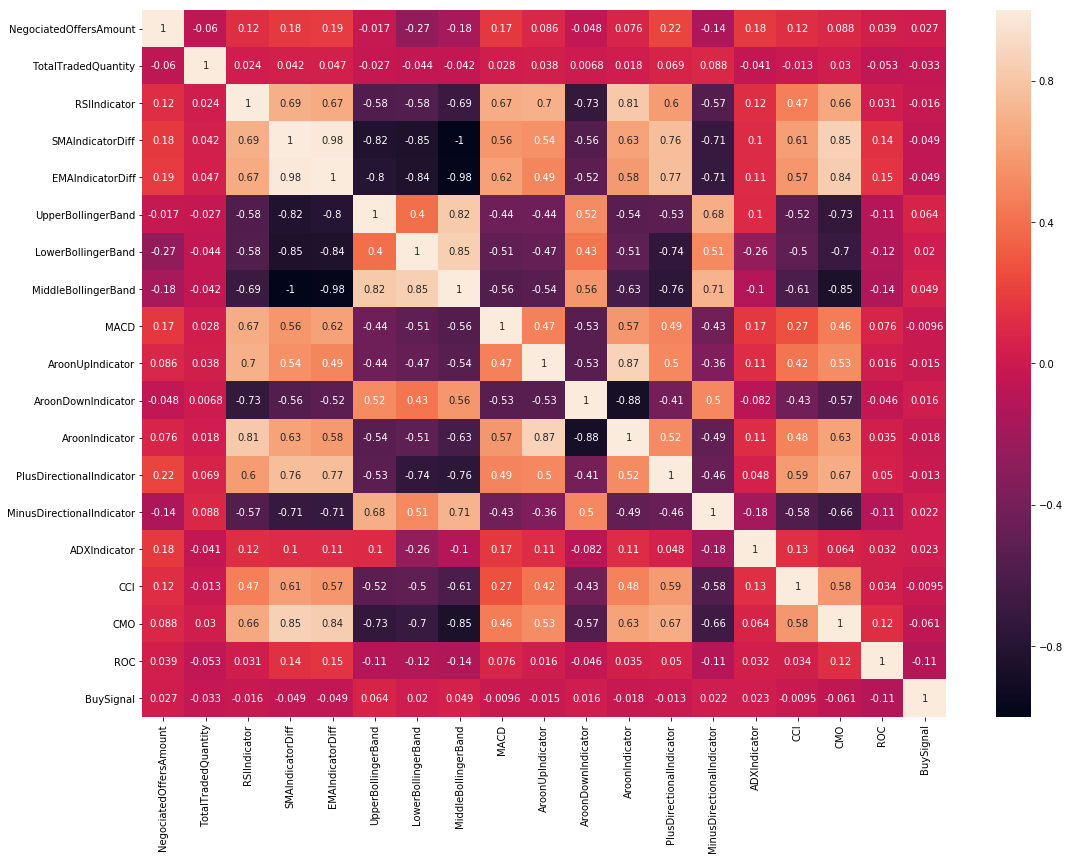

In [8]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
y_train = data_frame["BuySignal"]
x_train = data_frame.drop(["BuySignal", "Start", "End"], axis=1)
#x_train = x_train.drop(["LowerBollingerBand", "AroonUpIndicator", "AroonDownIndicator", "AroonIndicator"], axis=1)
#x_train = data_frame.drop(["BuySignal", "Start", "End", "NormalizedClosePrice", "NormalizedOpenPrice", "NormalizedMediumPrice","NormalizedFirstTradePrice", "NormalizedMaxBuyOffer", "NormalizedMinSellOffer" ], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,128,55900,0.394737,-0.020000,0.033470,0.219538,-0.179538,0.020000,-0.015751,14.285714,100.000000,-85.714286,17.585905,24.000935,0.000000,-46.774733,-24.561404,0.023935
1,58,19800,0.494505,0.000714,0.046341,0.199049,-0.200478,-0.000714,-0.010382,7.142857,92.857143,-85.714286,22.179673,21.049561,0.000000,-12.872358,0.884956,0.000000
2,59,23500,0.394737,0.022143,0.048829,0.155045,-0.199331,-0.022143,-0.005260,21.428571,85.714286,-64.285714,19.924403,18.909203,25.454376,-3.404149,30.693069,0.000000
3,65,13100,0.455882,-0.003571,0.016318,0.175010,-0.167867,0.003571,-0.003580,14.285714,78.571429,-64.285714,20.030962,16.746465,24.484596,2.407266,-5.494505,0.000000
4,72,23800,0.442857,0.032143,0.040143,0.133559,-0.197845,-0.032143,0.000170,7.142857,71.428571,-64.285714,19.061865,14.911780,24.599977,-0.957926,48.387097,-0.047801


In [11]:
#x_train["NegociatedOffersAmount"].apply(np.log)
#x_train["TotalTradedQuantity"].apply(np.log)
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,4.852030,10.931320,0.394737,-0.020000,0.033470,0.219538,-0.179538,0.020000,-0.015751,14.285714,100.000000,-85.714286,17.585905,24.000935,0.000000,-46.774733,-24.561404,0.023935
1,4.060443,9.893437,0.494505,0.000714,0.046341,0.199049,-0.200478,-0.000714,-0.010382,7.142857,92.857143,-85.714286,22.179673,21.049561,0.000000,-12.872358,0.884956,0.000000
2,4.077537,10.064756,0.394737,0.022143,0.048829,0.155045,-0.199331,-0.022143,-0.005260,21.428571,85.714286,-64.285714,19.924403,18.909203,25.454376,-3.404149,30.693069,0.000000
3,4.174387,9.480368,0.455882,-0.003571,0.016318,0.175010,-0.167867,0.003571,-0.003580,14.285714,78.571429,-64.285714,20.030962,16.746465,24.484596,2.407266,-5.494505,0.000000
4,4.276666,10.077441,0.442857,0.032143,0.040143,0.133559,-0.197845,-0.032143,0.000170,7.142857,71.428571,-64.285714,19.061865,14.911780,24.599977,-0.957926,48.387097,-0.047801


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,AroonDownIndicator,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC
0,0.620434,0.434806,0.381039,0.406902,0.476524,0.530293,0.690371,0.593098,0.380934,0.076923,1.000000,0.038462,0.207465,0.336195,0.000000,0.167649,0.377193,0.452248
1,0.502342,0.354693,0.494814,0.427750,0.493584,0.511572,0.675643,0.572250,0.394133,0.000000,0.923077,0.038462,0.269310,0.292283,0.000000,0.238769,0.504425,0.428958
2,0.504893,0.367917,0.381039,0.449317,0.496881,0.471363,0.676450,0.550683,0.406727,0.153846,0.846154,0.153846,0.238947,0.260438,0.260733,0.258632,0.653465,0.428958
3,0.519341,0.322809,0.450769,0.423436,0.453789,0.489606,0.698580,0.576564,0.410857,0.076923,0.769231,0.153846,0.240382,0.228261,0.250800,0.270823,0.472527,0.428958
4,0.534599,0.368896,0.435915,0.459382,0.485368,0.451731,0.677495,0.540618,0.420078,0.000000,0.692308,0.153846,0.227335,0.200964,0.251982,0.263763,0.741935,0.382444


In [13]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [14]:
#mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
#cross_val_score(mlp, x_train, y_train, scoring = 'balanced_accuracy', cv=10)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#log_reg = LogisticRegression(C=1000)
#svc = LinearSVC(C=100, max_iter=1000000)

#print(cross_val_score(log_reg, x_train, y_train, scoring = 'balanced_accuracy', cv=5))
#print(cross_val_score(svc, x_train, y_train, scoring = 'balanced_accuracy', cv=5))

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [16]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

average_data_per_day = 120
max_days_interval = 25
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            new_mlp.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_mlp.predict(x_train[middle_range:max_range])
            
            #print("MLP (TP, FP, TN, FN): " + str(perf_measure(y_train[min_range:middle_range], y_predict)))
            
            acc_mlp_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            mlp_score_arr.append(mlp_score)

            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train[min_range:middle_range], y_train[min_range:middle_range])
            y_predict = new_logreg.predict(x_train[middle_range:max_range])
                  
            #print("LogReg (TP, FP, TN, FN): " + str(perf_measure(y_train[min_range:middle_range], y_predict)))
                  
            acc_logreg_score = accuracy_score(y_train[middle_range:max_range], y_predict)
            acc_logreg_score_arr.append(acc_mlp_score)
            logreg_score = balanced_accuracy_score(y_train[middle_range:max_range], y_predict)
            logreg_score_arr.append(logreg_score)
        
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr)))     
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))   

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5290986085904418
LogReg Average Accuracy Score: 0.5290986085904418
MLP Average Balanced Accuracy Score: 0.5157120638012146
LogReg Average Balanced Accuracy Score: 0.5046628597587356
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5342911877394636
LogReg Average Accuracy Score: 0.5342911877394636
MLP Average Balanced Accuracy Score: 0.4967527097485616
LogReg Average Balanced Accuracy Score: 0.501061983025491
Days used to train: 3
Days to be predicted: 1
MLP Average Accuracy Score: 0.5323867478025694
LogReg Average Accuracy Score: 0.5323867478025694
MLP Average Balanced Accuracy Score: 0.5103032770261138
LogReg Average Balanced Accuracy Score: 0.509339523338304
Days used to train: 4
Days to be predicted: 1
MLP Average Accuracy Score: 0.5383620689655173
LogReg Average Accuracy Score: 0.5383620689655173
MLP Average Balanced Accuracy Score: 0.5078690737218609
LogReg Average Balanced Accur

In [17]:
data_frame.to_csv('all-data-ever.csv')

In [18]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)


select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]

mlp = MLPClassifier(hidden_layer_sizes=[100])
scores = cross_val_score(mlp, X_train_selected, y_train, scoring = 'balanced_accuracy')

scores

array([0.51151538, 0.5313533 , 0.50586224])

In [19]:
columns_with_support

array(['NegociatedOffersAmount', 'SMAIndicatorDiff', 'EMAIndicatorDiff',
       'UpperBollingerBand', 'MiddleBollingerBand',
       'MinusDirectionalIndicator', 'ADXIndicator', 'CMO', 'ROC'],
      dtype=object)

In [20]:
columns_without_support = columns[np.invert(support)]
columns_without_support

array(['TotalTradedQuantity', 'RSIIndicator', 'LowerBollingerBand',
       'MACD', 'AroonUpIndicator', 'AroonDownIndicator', 'AroonIndicator',
       'PlusDirectionalIndicator', 'CCI'], dtype=object)

In [21]:
log_reg = LogisticRegression(C=1000)

print(cross_val_score(log_reg, X_train_selected, y_train, scoring = 'balanced_accuracy'))

[0.51466371 0.52449199 0.52727248]


In [22]:
print ('Univariate Statistics: Columns selected')
print(columns_with_support)
print ('Univariate Statistics: Columns without support')
print(columns_without_support)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

select.fit(x_train, y_train)
# transform training set
X_train_selected = select.transform(x_train)

columns = np.asarray(x_train.columns.values)
support = np.asarray(select.get_support())
columns_with_support = columns[support]
columns_without_support = columns[np.invert(support)]

Univariate Statistics: Columns selected
['NegociatedOffersAmount' 'SMAIndicatorDiff' 'EMAIndicatorDiff'
 'UpperBollingerBand' 'MiddleBollingerBand' 'MinusDirectionalIndicator'
 'ADXIndicator' 'CMO' 'ROC']
Univariate Statistics: Columns without support
['TotalTradedQuantity' 'RSIIndicator' 'LowerBollingerBand' 'MACD'
 'AroonUpIndicator' 'AroonDownIndicator' 'AroonIndicator'
 'PlusDirectionalIndicator' 'CCI']


In [23]:
print ('Model-Based Feature Selection: Columns selected')
print(columns_with_support)
print ('Model-Based Feature Selection: Columns without support')
print(columns_without_support)

Model-Based Feature Selection: Columns selected
['NegociatedOffersAmount' 'TotalTradedQuantity' 'RSIIndicator'
 'LowerBollingerBand' 'MACD' 'PlusDirectionalIndicator'
 'MinusDirectionalIndicator' 'ADXIndicator' 'CCI']
Model-Based Feature Selection: Columns without support
['SMAIndicatorDiff' 'EMAIndicatorDiff' 'UpperBollingerBand'
 'MiddleBollingerBand' 'AroonUpIndicator' 'AroonDownIndicator'
 'AroonIndicator' 'CMO' 'ROC']
